# Logistic Regression Case Study on Lead Scoring

First we will import required libraries and also, ignore warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#### Reading and Checking Data

In [2]:
leads_df= pd.read_csv('leads.csv')

In [3]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
x=len(leads_df)
x

9240

#### Checking the Null values in the Data Frame

In [6]:
round(100*(leads_df.isnull().sum())/len(leads_df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Next, we replace all the cells which have 'Select' with Nan (Null Values)

In [7]:
leads_df = leads_df.replace('Select',np.nan)

In [8]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Next, we drop all the columns with more than 40% missing as there will be lot left to ambiguity.

In [9]:
leads_df = leads_df[leads_df.columns[leads_df.isna().sum()<(len(leads_df)*0.4)]]

In [10]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [11]:
round(100*(leads_df.isnull().sum())/len(leads_df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
len(leads_df.columns)

30

In [13]:
leads_df.shape

(9240, 30)

Now, let's check the rows which have more percentage of missing values. Here, I considered 70% as the threshold to remove the rows with most missing values.

In [14]:
for i in range(len(leads_df['Lead Number'])) :
    print(" Total NaN in row", i + 1,
          (round(100*(leads_df.iloc[i].isnull().sum())/len(leads_df.columns))>70))

 Total NaN in row 1 False
 Total NaN in row 2 False
 Total NaN in row 3 False
 Total NaN in row 4 False
 Total NaN in row 5 False
 Total NaN in row 6 False
 Total NaN in row 7 False
 Total NaN in row 8 False
 Total NaN in row 9 False
 Total NaN in row 10 False
 Total NaN in row 11 False
 Total NaN in row 12 False
 Total NaN in row 13 False
 Total NaN in row 14 False
 Total NaN in row 15 False
 Total NaN in row 16 False
 Total NaN in row 17 False
 Total NaN in row 18 False
 Total NaN in row 19 False
 Total NaN in row 20 False
 Total NaN in row 21 False
 Total NaN in row 22 False
 Total NaN in row 23 False
 Total NaN in row 24 False
 Total NaN in row 25 False
 Total NaN in row 26 False
 Total NaN in row 27 False
 Total NaN in row 28 False
 Total NaN in row 29 False
 Total NaN in row 30 False
 Total NaN in row 31 False
 Total NaN in row 32 False
 Total NaN in row 33 False
 Total NaN in row 34 False
 Total NaN in row 35 False
 Total NaN in row 36 False
 Total NaN in row 37 False
 Total NaN

 Total NaN in row 463 False
 Total NaN in row 464 False
 Total NaN in row 465 False
 Total NaN in row 466 False
 Total NaN in row 467 False
 Total NaN in row 468 False
 Total NaN in row 469 False
 Total NaN in row 470 False
 Total NaN in row 471 False
 Total NaN in row 472 False
 Total NaN in row 473 False
 Total NaN in row 474 False
 Total NaN in row 475 False
 Total NaN in row 476 False
 Total NaN in row 477 False
 Total NaN in row 478 False
 Total NaN in row 479 False
 Total NaN in row 480 False
 Total NaN in row 481 False
 Total NaN in row 482 False
 Total NaN in row 483 False
 Total NaN in row 484 False
 Total NaN in row 485 False
 Total NaN in row 486 False
 Total NaN in row 487 False
 Total NaN in row 488 False
 Total NaN in row 489 False
 Total NaN in row 490 False
 Total NaN in row 491 False
 Total NaN in row 492 False
 Total NaN in row 493 False
 Total NaN in row 494 False
 Total NaN in row 495 False
 Total NaN in row 496 False
 Total NaN in row 497 False
 Total NaN in row 49

 Total NaN in row 903 False
 Total NaN in row 904 False
 Total NaN in row 905 False
 Total NaN in row 906 False
 Total NaN in row 907 False
 Total NaN in row 908 False
 Total NaN in row 909 False
 Total NaN in row 910 False
 Total NaN in row 911 False
 Total NaN in row 912 False
 Total NaN in row 913 False
 Total NaN in row 914 False
 Total NaN in row 915 False
 Total NaN in row 916 False
 Total NaN in row 917 False
 Total NaN in row 918 False
 Total NaN in row 919 False
 Total NaN in row 920 False
 Total NaN in row 921 False
 Total NaN in row 922 False
 Total NaN in row 923 False
 Total NaN in row 924 False
 Total NaN in row 925 False
 Total NaN in row 926 False
 Total NaN in row 927 False
 Total NaN in row 928 False
 Total NaN in row 929 False
 Total NaN in row 930 False
 Total NaN in row 931 False
 Total NaN in row 932 False
 Total NaN in row 933 False
 Total NaN in row 934 False
 Total NaN in row 935 False
 Total NaN in row 936 False
 Total NaN in row 937 False
 Total NaN in row 93

 Total NaN in row 1340 False
 Total NaN in row 1341 False
 Total NaN in row 1342 False
 Total NaN in row 1343 False
 Total NaN in row 1344 False
 Total NaN in row 1345 False
 Total NaN in row 1346 False
 Total NaN in row 1347 False
 Total NaN in row 1348 False
 Total NaN in row 1349 False
 Total NaN in row 1350 False
 Total NaN in row 1351 False
 Total NaN in row 1352 False
 Total NaN in row 1353 False
 Total NaN in row 1354 False
 Total NaN in row 1355 False
 Total NaN in row 1356 False
 Total NaN in row 1357 False
 Total NaN in row 1358 False
 Total NaN in row 1359 False
 Total NaN in row 1360 False
 Total NaN in row 1361 False
 Total NaN in row 1362 False
 Total NaN in row 1363 False
 Total NaN in row 1364 False
 Total NaN in row 1365 False
 Total NaN in row 1366 False
 Total NaN in row 1367 False
 Total NaN in row 1368 False
 Total NaN in row 1369 False
 Total NaN in row 1370 False
 Total NaN in row 1371 False
 Total NaN in row 1372 False
 Total NaN in row 1373 False
 Total NaN in 

 Total NaN in row 1811 False
 Total NaN in row 1812 False
 Total NaN in row 1813 False
 Total NaN in row 1814 False
 Total NaN in row 1815 False
 Total NaN in row 1816 False
 Total NaN in row 1817 False
 Total NaN in row 1818 False
 Total NaN in row 1819 False
 Total NaN in row 1820 False
 Total NaN in row 1821 False
 Total NaN in row 1822 False
 Total NaN in row 1823 False
 Total NaN in row 1824 False
 Total NaN in row 1825 False
 Total NaN in row 1826 False
 Total NaN in row 1827 False
 Total NaN in row 1828 False
 Total NaN in row 1829 False
 Total NaN in row 1830 False
 Total NaN in row 1831 False
 Total NaN in row 1832 False
 Total NaN in row 1833 False
 Total NaN in row 1834 False
 Total NaN in row 1835 False
 Total NaN in row 1836 False
 Total NaN in row 1837 False
 Total NaN in row 1838 False
 Total NaN in row 1839 False
 Total NaN in row 1840 False
 Total NaN in row 1841 False
 Total NaN in row 1842 False
 Total NaN in row 1843 False
 Total NaN in row 1844 False
 Total NaN in 

 Total NaN in row 2296 False
 Total NaN in row 2297 False
 Total NaN in row 2298 False
 Total NaN in row 2299 False
 Total NaN in row 2300 False
 Total NaN in row 2301 False
 Total NaN in row 2302 False
 Total NaN in row 2303 False
 Total NaN in row 2304 False
 Total NaN in row 2305 False
 Total NaN in row 2306 False
 Total NaN in row 2307 False
 Total NaN in row 2308 False
 Total NaN in row 2309 False
 Total NaN in row 2310 False
 Total NaN in row 2311 False
 Total NaN in row 2312 False
 Total NaN in row 2313 False
 Total NaN in row 2314 False
 Total NaN in row 2315 False
 Total NaN in row 2316 False
 Total NaN in row 2317 False
 Total NaN in row 2318 False
 Total NaN in row 2319 False
 Total NaN in row 2320 False
 Total NaN in row 2321 False
 Total NaN in row 2322 False
 Total NaN in row 2323 False
 Total NaN in row 2324 False
 Total NaN in row 2325 False
 Total NaN in row 2326 False
 Total NaN in row 2327 False
 Total NaN in row 2328 False
 Total NaN in row 2329 False
 Total NaN in 

 Total NaN in row 2795 False
 Total NaN in row 2796 False
 Total NaN in row 2797 False
 Total NaN in row 2798 False
 Total NaN in row 2799 False
 Total NaN in row 2800 False
 Total NaN in row 2801 False
 Total NaN in row 2802 False
 Total NaN in row 2803 False
 Total NaN in row 2804 False
 Total NaN in row 2805 False
 Total NaN in row 2806 False
 Total NaN in row 2807 False
 Total NaN in row 2808 False
 Total NaN in row 2809 False
 Total NaN in row 2810 False
 Total NaN in row 2811 False
 Total NaN in row 2812 False
 Total NaN in row 2813 False
 Total NaN in row 2814 False
 Total NaN in row 2815 False
 Total NaN in row 2816 False
 Total NaN in row 2817 False
 Total NaN in row 2818 False
 Total NaN in row 2819 False
 Total NaN in row 2820 False
 Total NaN in row 2821 False
 Total NaN in row 2822 False
 Total NaN in row 2823 False
 Total NaN in row 2824 False
 Total NaN in row 2825 False
 Total NaN in row 2826 False
 Total NaN in row 2827 False
 Total NaN in row 2828 False
 Total NaN in 

 Total NaN in row 3289 False
 Total NaN in row 3290 False
 Total NaN in row 3291 False
 Total NaN in row 3292 False
 Total NaN in row 3293 False
 Total NaN in row 3294 False
 Total NaN in row 3295 False
 Total NaN in row 3296 False
 Total NaN in row 3297 False
 Total NaN in row 3298 False
 Total NaN in row 3299 False
 Total NaN in row 3300 False
 Total NaN in row 3301 False
 Total NaN in row 3302 False
 Total NaN in row 3303 False
 Total NaN in row 3304 False
 Total NaN in row 3305 False
 Total NaN in row 3306 False
 Total NaN in row 3307 False
 Total NaN in row 3308 False
 Total NaN in row 3309 False
 Total NaN in row 3310 False
 Total NaN in row 3311 False
 Total NaN in row 3312 False
 Total NaN in row 3313 False
 Total NaN in row 3314 False
 Total NaN in row 3315 False
 Total NaN in row 3316 False
 Total NaN in row 3317 False
 Total NaN in row 3318 False
 Total NaN in row 3319 False
 Total NaN in row 3320 False
 Total NaN in row 3321 False
 Total NaN in row 3322 False
 Total NaN in 

 Total NaN in row 3784 False
 Total NaN in row 3785 False
 Total NaN in row 3786 False
 Total NaN in row 3787 False
 Total NaN in row 3788 False
 Total NaN in row 3789 False
 Total NaN in row 3790 False
 Total NaN in row 3791 False
 Total NaN in row 3792 False
 Total NaN in row 3793 False
 Total NaN in row 3794 False
 Total NaN in row 3795 False
 Total NaN in row 3796 False
 Total NaN in row 3797 False
 Total NaN in row 3798 False
 Total NaN in row 3799 False
 Total NaN in row 3800 False
 Total NaN in row 3801 False
 Total NaN in row 3802 False
 Total NaN in row 3803 False
 Total NaN in row 3804 False
 Total NaN in row 3805 False
 Total NaN in row 3806 False
 Total NaN in row 3807 False
 Total NaN in row 3808 False
 Total NaN in row 3809 False
 Total NaN in row 3810 False
 Total NaN in row 3811 False
 Total NaN in row 3812 False
 Total NaN in row 3813 False
 Total NaN in row 3814 False
 Total NaN in row 3815 False
 Total NaN in row 3816 False
 Total NaN in row 3817 False
 Total NaN in 

 Total NaN in row 4261 False
 Total NaN in row 4262 False
 Total NaN in row 4263 False
 Total NaN in row 4264 False
 Total NaN in row 4265 False
 Total NaN in row 4266 False
 Total NaN in row 4267 False
 Total NaN in row 4268 False
 Total NaN in row 4269 False
 Total NaN in row 4270 False
 Total NaN in row 4271 False
 Total NaN in row 4272 False
 Total NaN in row 4273 False
 Total NaN in row 4274 False
 Total NaN in row 4275 False
 Total NaN in row 4276 False
 Total NaN in row 4277 False
 Total NaN in row 4278 False
 Total NaN in row 4279 False
 Total NaN in row 4280 False
 Total NaN in row 4281 False
 Total NaN in row 4282 False
 Total NaN in row 4283 False
 Total NaN in row 4284 False
 Total NaN in row 4285 False
 Total NaN in row 4286 False
 Total NaN in row 4287 False
 Total NaN in row 4288 False
 Total NaN in row 4289 False
 Total NaN in row 4290 False
 Total NaN in row 4291 False
 Total NaN in row 4292 False
 Total NaN in row 4293 False
 Total NaN in row 4294 False
 Total NaN in 

 Total NaN in row 4735 False
 Total NaN in row 4736 False
 Total NaN in row 4737 False
 Total NaN in row 4738 False
 Total NaN in row 4739 False
 Total NaN in row 4740 False
 Total NaN in row 4741 False
 Total NaN in row 4742 False
 Total NaN in row 4743 False
 Total NaN in row 4744 False
 Total NaN in row 4745 False
 Total NaN in row 4746 False
 Total NaN in row 4747 False
 Total NaN in row 4748 False
 Total NaN in row 4749 False
 Total NaN in row 4750 False
 Total NaN in row 4751 False
 Total NaN in row 4752 False
 Total NaN in row 4753 False
 Total NaN in row 4754 False
 Total NaN in row 4755 False
 Total NaN in row 4756 False
 Total NaN in row 4757 False
 Total NaN in row 4758 False
 Total NaN in row 4759 False
 Total NaN in row 4760 False
 Total NaN in row 4761 False
 Total NaN in row 4762 False
 Total NaN in row 4763 False
 Total NaN in row 4764 False
 Total NaN in row 4765 False
 Total NaN in row 4766 False
 Total NaN in row 4767 False
 Total NaN in row 4768 False
 Total NaN in 

 Total NaN in row 5219 False
 Total NaN in row 5220 False
 Total NaN in row 5221 False
 Total NaN in row 5222 False
 Total NaN in row 5223 False
 Total NaN in row 5224 False
 Total NaN in row 5225 False
 Total NaN in row 5226 False
 Total NaN in row 5227 False
 Total NaN in row 5228 False
 Total NaN in row 5229 False
 Total NaN in row 5230 False
 Total NaN in row 5231 False
 Total NaN in row 5232 False
 Total NaN in row 5233 False
 Total NaN in row 5234 False
 Total NaN in row 5235 False
 Total NaN in row 5236 False
 Total NaN in row 5237 False
 Total NaN in row 5238 False
 Total NaN in row 5239 False
 Total NaN in row 5240 False
 Total NaN in row 5241 False
 Total NaN in row 5242 False
 Total NaN in row 5243 False
 Total NaN in row 5244 False
 Total NaN in row 5245 False
 Total NaN in row 5246 False
 Total NaN in row 5247 False
 Total NaN in row 5248 False
 Total NaN in row 5249 False
 Total NaN in row 5250 False
 Total NaN in row 5251 False
 Total NaN in row 5252 False
 Total NaN in 

 Total NaN in row 5706 False
 Total NaN in row 5707 False
 Total NaN in row 5708 False
 Total NaN in row 5709 False
 Total NaN in row 5710 False
 Total NaN in row 5711 False
 Total NaN in row 5712 False
 Total NaN in row 5713 False
 Total NaN in row 5714 False
 Total NaN in row 5715 False
 Total NaN in row 5716 False
 Total NaN in row 5717 False
 Total NaN in row 5718 False
 Total NaN in row 5719 False
 Total NaN in row 5720 False
 Total NaN in row 5721 False
 Total NaN in row 5722 False
 Total NaN in row 5723 False
 Total NaN in row 5724 False
 Total NaN in row 5725 False
 Total NaN in row 5726 False
 Total NaN in row 5727 False
 Total NaN in row 5728 False
 Total NaN in row 5729 False
 Total NaN in row 5730 False
 Total NaN in row 5731 False
 Total NaN in row 5732 False
 Total NaN in row 5733 False
 Total NaN in row 5734 False
 Total NaN in row 5735 False
 Total NaN in row 5736 False
 Total NaN in row 5737 False
 Total NaN in row 5738 False
 Total NaN in row 5739 False
 Total NaN in 

 Total NaN in row 6197 False
 Total NaN in row 6198 False
 Total NaN in row 6199 False
 Total NaN in row 6200 False
 Total NaN in row 6201 False
 Total NaN in row 6202 False
 Total NaN in row 6203 False
 Total NaN in row 6204 False
 Total NaN in row 6205 False
 Total NaN in row 6206 False
 Total NaN in row 6207 False
 Total NaN in row 6208 False
 Total NaN in row 6209 False
 Total NaN in row 6210 False
 Total NaN in row 6211 False
 Total NaN in row 6212 False
 Total NaN in row 6213 False
 Total NaN in row 6214 False
 Total NaN in row 6215 False
 Total NaN in row 6216 False
 Total NaN in row 6217 False
 Total NaN in row 6218 False
 Total NaN in row 6219 False
 Total NaN in row 6220 False
 Total NaN in row 6221 False
 Total NaN in row 6222 False
 Total NaN in row 6223 False
 Total NaN in row 6224 False
 Total NaN in row 6225 False
 Total NaN in row 6226 False
 Total NaN in row 6227 False
 Total NaN in row 6228 False
 Total NaN in row 6229 False
 Total NaN in row 6230 False
 Total NaN in 

 Total NaN in row 6684 False
 Total NaN in row 6685 False
 Total NaN in row 6686 False
 Total NaN in row 6687 False
 Total NaN in row 6688 False
 Total NaN in row 6689 False
 Total NaN in row 6690 False
 Total NaN in row 6691 False
 Total NaN in row 6692 False
 Total NaN in row 6693 False
 Total NaN in row 6694 False
 Total NaN in row 6695 False
 Total NaN in row 6696 False
 Total NaN in row 6697 False
 Total NaN in row 6698 False
 Total NaN in row 6699 False
 Total NaN in row 6700 False
 Total NaN in row 6701 False
 Total NaN in row 6702 False
 Total NaN in row 6703 False
 Total NaN in row 6704 False
 Total NaN in row 6705 False
 Total NaN in row 6706 False
 Total NaN in row 6707 False
 Total NaN in row 6708 False
 Total NaN in row 6709 False
 Total NaN in row 6710 False
 Total NaN in row 6711 False
 Total NaN in row 6712 False
 Total NaN in row 6713 False
 Total NaN in row 6714 False
 Total NaN in row 6715 False
 Total NaN in row 6716 False
 Total NaN in row 6717 False
 Total NaN in 

 Total NaN in row 7163 False
 Total NaN in row 7164 False
 Total NaN in row 7165 False
 Total NaN in row 7166 False
 Total NaN in row 7167 False
 Total NaN in row 7168 False
 Total NaN in row 7169 False
 Total NaN in row 7170 False
 Total NaN in row 7171 False
 Total NaN in row 7172 False
 Total NaN in row 7173 False
 Total NaN in row 7174 False
 Total NaN in row 7175 False
 Total NaN in row 7176 False
 Total NaN in row 7177 False
 Total NaN in row 7178 False
 Total NaN in row 7179 False
 Total NaN in row 7180 False
 Total NaN in row 7181 False
 Total NaN in row 7182 False
 Total NaN in row 7183 False
 Total NaN in row 7184 False
 Total NaN in row 7185 False
 Total NaN in row 7186 False
 Total NaN in row 7187 False
 Total NaN in row 7188 False
 Total NaN in row 7189 False
 Total NaN in row 7190 False
 Total NaN in row 7191 False
 Total NaN in row 7192 False
 Total NaN in row 7193 False
 Total NaN in row 7194 False
 Total NaN in row 7195 False
 Total NaN in row 7196 False
 Total NaN in 

 Total NaN in row 7652 False
 Total NaN in row 7653 False
 Total NaN in row 7654 False
 Total NaN in row 7655 False
 Total NaN in row 7656 False
 Total NaN in row 7657 False
 Total NaN in row 7658 False
 Total NaN in row 7659 False
 Total NaN in row 7660 False
 Total NaN in row 7661 False
 Total NaN in row 7662 False
 Total NaN in row 7663 False
 Total NaN in row 7664 False
 Total NaN in row 7665 False
 Total NaN in row 7666 False
 Total NaN in row 7667 False
 Total NaN in row 7668 False
 Total NaN in row 7669 False
 Total NaN in row 7670 False
 Total NaN in row 7671 False
 Total NaN in row 7672 False
 Total NaN in row 7673 False
 Total NaN in row 7674 False
 Total NaN in row 7675 False
 Total NaN in row 7676 False
 Total NaN in row 7677 False
 Total NaN in row 7678 False
 Total NaN in row 7679 False
 Total NaN in row 7680 False
 Total NaN in row 7681 False
 Total NaN in row 7682 False
 Total NaN in row 7683 False
 Total NaN in row 7684 False
 Total NaN in row 7685 False
 Total NaN in 

 Total NaN in row 8135 False
 Total NaN in row 8136 False
 Total NaN in row 8137 False
 Total NaN in row 8138 False
 Total NaN in row 8139 False
 Total NaN in row 8140 False
 Total NaN in row 8141 False
 Total NaN in row 8142 False
 Total NaN in row 8143 False
 Total NaN in row 8144 False
 Total NaN in row 8145 False
 Total NaN in row 8146 False
 Total NaN in row 8147 False
 Total NaN in row 8148 False
 Total NaN in row 8149 False
 Total NaN in row 8150 False
 Total NaN in row 8151 False
 Total NaN in row 8152 False
 Total NaN in row 8153 False
 Total NaN in row 8154 False
 Total NaN in row 8155 False
 Total NaN in row 8156 False
 Total NaN in row 8157 False
 Total NaN in row 8158 False
 Total NaN in row 8159 False
 Total NaN in row 8160 False
 Total NaN in row 8161 False
 Total NaN in row 8162 False
 Total NaN in row 8163 False
 Total NaN in row 8164 False
 Total NaN in row 8165 False
 Total NaN in row 8166 False
 Total NaN in row 8167 False
 Total NaN in row 8168 False
 Total NaN in 

 Total NaN in row 8627 False
 Total NaN in row 8628 False
 Total NaN in row 8629 False
 Total NaN in row 8630 False
 Total NaN in row 8631 False
 Total NaN in row 8632 False
 Total NaN in row 8633 False
 Total NaN in row 8634 False
 Total NaN in row 8635 False
 Total NaN in row 8636 False
 Total NaN in row 8637 False
 Total NaN in row 8638 False
 Total NaN in row 8639 False
 Total NaN in row 8640 False
 Total NaN in row 8641 False
 Total NaN in row 8642 False
 Total NaN in row 8643 False
 Total NaN in row 8644 False
 Total NaN in row 8645 False
 Total NaN in row 8646 False
 Total NaN in row 8647 False
 Total NaN in row 8648 False
 Total NaN in row 8649 False
 Total NaN in row 8650 False
 Total NaN in row 8651 False
 Total NaN in row 8652 False
 Total NaN in row 8653 False
 Total NaN in row 8654 False
 Total NaN in row 8655 False
 Total NaN in row 8656 False
 Total NaN in row 8657 False
 Total NaN in row 8658 False
 Total NaN in row 8659 False
 Total NaN in row 8660 False
 Total NaN in 

 Total NaN in row 9119 False
 Total NaN in row 9120 False
 Total NaN in row 9121 False
 Total NaN in row 9122 False
 Total NaN in row 9123 False
 Total NaN in row 9124 False
 Total NaN in row 9125 False
 Total NaN in row 9126 False
 Total NaN in row 9127 False
 Total NaN in row 9128 False
 Total NaN in row 9129 False
 Total NaN in row 9130 False
 Total NaN in row 9131 False
 Total NaN in row 9132 False
 Total NaN in row 9133 False
 Total NaN in row 9134 False
 Total NaN in row 9135 False
 Total NaN in row 9136 False
 Total NaN in row 9137 False
 Total NaN in row 9138 False
 Total NaN in row 9139 False
 Total NaN in row 9140 False
 Total NaN in row 9141 False
 Total NaN in row 9142 False
 Total NaN in row 9143 False
 Total NaN in row 9144 False
 Total NaN in row 9145 False
 Total NaN in row 9146 False
 Total NaN in row 9147 False
 Total NaN in row 9148 False
 Total NaN in row 9149 False
 Total NaN in row 9150 False
 Total NaN in row 9151 False
 Total NaN in row 9152 False
 Total NaN in 

In [15]:
perc = 70.0 
min_count =  int(((100-perc)/100)*leads_df.shape[1] + 1)
leads_df = leads_df.dropna( axis=0, thresh=min_count)

In [16]:
leads_df.shape

(9240, 30)

We can observe that, none of the rows have more than 70% missing Values

### Missing Value Imputation

Next we start with the missing value imputations.

In [17]:
leads_df.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [18]:
leads_df['Tags'].fillna(leads_df['Tags'].mode()[0],inplace=True)
leads_df['Tags'].isnull().sum()

0

Since, this is a categorical varable we impute missing values using Mode.

Also, since there are lot of Variables, we are keeping the top 5 variables and bunch all the remaining variables into 'Others' Category.

In [19]:
need = leads_df['Tags'].value_counts().index[:5]
leads_df['Tags'] = np.where(leads_df['Tags'].isin(need), leads_df['Tags'], 'Others')

In [20]:
leads_df.Tags.value_counts(normalize=True)

Will revert after reading the email    0.587121
Others                                 0.138095
Ringing                                0.130195
Interested in other courses            0.055519
Already a student                      0.050325
Closed by Horizzon                     0.038745
Name: Tags, dtype: float64

In [21]:
leads_df['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [22]:
leads_df['Specialization'].fillna(leads_df['Specialization'].mode()[0],inplace=True)
leads_df['Specialization'].isnull().sum()

0

Since, this is a categorical varable we impute missing values using Mode.

Also, since there are lot of Variables, we are keeping the top 5 variables and bunch all the remaining variables into 'Others' Category.

In [23]:
need1 = leads_df['Specialization'].value_counts().index[:5]
leads_df['Specialization'] = np.where(leads_df['Specialization'].isin(need1), leads_df['Specialization'], 'Others')

In [24]:
leads_df['Specialization'].value_counts(normalize=True)

Finance Management           0.471429
Others                       0.248052
Human Resource Management    0.091775
Marketing Management         0.090693
Operations Management        0.054437
Business Administration      0.043615
Name: Specialization, dtype: float64

In [25]:
leads_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [26]:
leads_df['What is your current occupation'].fillna(leads_df['What is your current occupation'].mode()[0],inplace=True)
leads_df['What is your current occupation'].isnull().sum()

0

Since, this is a categorical varable we impute missing values using Mode.

Also, since there are lot of Variables, we are keeping the top 2 variables and bunch all the remaining variables into 'Others' Category.

In [27]:
need5 = leads_df['What is your current occupation'].value_counts().index[:2]
leads_df['What is your current occupation'] = np.where(leads_df['What is your current occupation'].isin(need5), leads_df['What is your current occupation'], 'Others')

In [28]:
leads_df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Others                  0.026407
Name: What is your current occupation, dtype: float64

In [29]:
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [30]:
leads_df = leads_df.drop(['What matters most to you in choosing a course'],axis=1)

In [31]:
leads_df['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Press_Release        0.000217
Social Media         0.000217
welearnblog_Home     0.000109
youtubechannel       0.000109
blog                 0.000109
NC_EDM               0.000109
Pay per Click Ads    0.000109
WeLearn              0.000109
testone              0.000109
Name: Lead Source, dtype: float64

In [32]:
leads_df['Lead Source'].fillna(leads_df['Lead Source'].mode()[0],inplace=True)
leads_df['Lead Source'].isnull().sum()

0

Since, this is a categorical varable we impute missing values using Mode.

Also, since there are lot of Variables, we are keeping the top 5 variables and bunch all the remaining variables into 'Others' Category.

In [33]:
need2 = leads_df['Lead Source'].value_counts().index[:5]
leads_df['Lead Source'] = np.where(leads_df['Lead Source'].isin(need2), leads_df['Lead Source'], 'Others')

In [34]:
leads_df['Lead Source'].value_counts(normalize=True)

Google            0.314286
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
Others            0.037879
Name: Lead Source, dtype: float64

In [35]:
leads_df['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

There are lot of Variables in this category, we are keeping the top 5 variables and bunch all the remaining variables into 'Others' Category.

In [36]:
need3 = leads_df['Lead Origin'].value_counts().index[:2]
leads_df['Lead Origin'] = np.where(leads_df['Lead Origin'].isin(need3), leads_df['Lead Origin'], 'Others')

In [37]:
leads_df['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Others                     0.083766
Name: Lead Origin, dtype: float64

In [38]:
leads_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

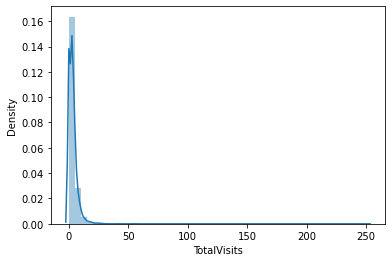

In [39]:
sns.distplot(leads_df['TotalVisits'])
plt.show()

This is a numerical variable we impute missing values using Median as the distribution is not normalized.

In [40]:
leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].median(), inplace=True)

In [41]:
leads_df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Resubscribed to emails          0.000109
Visited Booth in Tradeshow      0.000109
Name: Last Activity, dtype: float64

In [42]:
leads_df['Last Activity'].fillna(leads_df['Last Activity'].mode()[0],inplace=True)
leads_df['Last Activity'].isnull().sum()

0

Since, this is a categorical vairable we impute missing values using Mode.

Also, since there are lot of Variables, we are keeping the top 3 variables and bunch all the remaining variables into 'Others' Category.

In [43]:
need4 = leads_df['Last Activity'].value_counts().index[:3]
leads_df['Last Activity'] = np.where(leads_df['Last Activity'].isin(need4), leads_df['Last Activity'], 'Others')

In [44]:
leads_df['Last Activity'].value_counts(normalize=True)

Email Opened               0.383117
SMS Sent                   0.297078
Others                     0.214502
Olark Chat Conversation    0.105303
Name: Last Activity, dtype: float64

In [45]:
leads_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

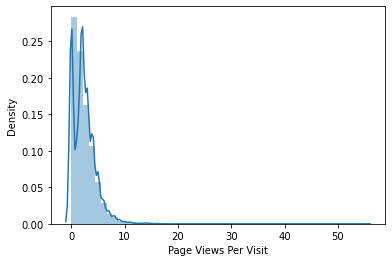

In [46]:
sns.distplot(leads_df['Page Views Per Visit'])
plt.show()

This is a numerical variable we impute missing values using Median as the distribution is not normalized.

In [47]:
leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].median(), inplace=True)

In [48]:
leads_df['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [49]:
leads_df['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [50]:
leads_df = leads_df.drop(['Do Not Call'],axis=1)

In [51]:
leads_df['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [52]:
leads_df = leads_df.drop(['Search'],axis=1)

In [53]:
leads_df['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [54]:
leads_df = leads_df.drop(['Magazine'],axis=1)

In [55]:
leads_df['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [56]:
leads_df = leads_df.drop(['Newspaper Article'],axis=1)

In [57]:
leads_df['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [58]:
leads_df = leads_df.drop(['X Education Forums'],axis=1)

In [59]:
leads_df['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [60]:
leads_df = leads_df.drop(['Newspaper'],axis=1)

In [61]:
leads_df['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [62]:
leads_df = leads_df.drop(['Digital Advertisement'],axis=1)

In [63]:
leads_df['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [64]:
leads_df = leads_df.drop(['Through Recommendations'],axis=1)

In [65]:
leads_df['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [66]:
leads_df = leads_df.drop(['Receive More Updates About Our Courses'],axis=1)

In [67]:
leads_df['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [68]:
leads_df = leads_df.drop(['Update me on Supply Chain Content'],axis=1)

In [69]:
leads_df['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [70]:
leads_df = leads_df.drop(['Get updates on DM Content'],axis=1)

In [71]:
leads_df['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [72]:
leads_df = leads_df.drop(['I agree to pay the amount through cheque'],axis=1)

In [73]:
leads_df['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

In [74]:
leads_df['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Email Received                  0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Approached upfront              0.000108
Name: Last Notable Activity, dtype: float64

There are lot of Variables in this category, we are keeping the top 3 variables and bunch all the remaining variables into 'Others' Category.

In [75]:
need6 = leads_df['Last Notable Activity'].value_counts().index[:3]
leads_df['Last Notable Activity'] = np.where(leads_df['Last Notable Activity'].isin(need6), leads_df['Last Notable Activity'], 'Others')

In [76]:
leads_df['Last Notable Activity'].value_counts(normalize=True)

Modified        0.368723
Email Opened    0.305952
SMS Sent        0.235065
Others          0.090260
Name: Last Notable Activity, dtype: float64

In [77]:
leads_df['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Kuwait                  0.000590
South Africa            0.000590
Canada                  0.000590
Nigeria                 0.000590
Germany                 0.000590
Sweden                  0.000443
Uganda                  0.000295
China                   0.000295
Bangladesh              0.000295
Ghana                   0.000295
Asia/Pacific Region     0.000295
Philippines             0.000295
Netherlands             0.000295
Belgium                 0.000295
Italy                   0.000295
Sri Lanka               0.000148
Switzerland             0.000148
Russia    

In [78]:
leads_df['Country'].fillna(leads_df['Country'].mode()[0],inplace=True)
leads_df['Country'].isnull().sum()

0

In [79]:
leads_df['Country'].value_counts(normalize=True)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Uganda                  0.000216
China                   0.000216
Bangladesh              0.000216
Ghana                   0.000216
Asia/Pacific Region     0.000216
Philippines             0.000216
Netherlands             0.000216
Belgium                 0.000216
Italy                   0.000216
Sri Lanka               0.000108
Switzerland             0.000108
Russia    

Here, we observe that, most of the response is in only 1 category. So, this is a highly Skewed Category and it's better to drop the column.

In [80]:
leads_df = leads_df.drop(['Country'],axis=1)

In [81]:
leads_df['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [82]:
leads_df['City'].fillna(leads_df['City'].mode()[0],inplace=True)
leads_df['City'].isnull().sum()

0

Since, this is a categorical vairable we impute missing values using Mode.

In [83]:
leads_df['City'].value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [84]:
round(100*(leads_df.isnull().sum())/len(leads_df),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

We can remove the 'Prospect ID' as it is a totally random data and this is not much useful for the Analysis.

In [85]:
leads_df = leads_df.drop(['Prospect ID'],axis=1)

In [86]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Others,Finance Management,Unemployed,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Others,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Others,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,Finance Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified


Next, we map binary variables and change Yes to 1 and No to 0

In [87]:
varlist =  ['Do Not Email','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [88]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Others,Finance Management,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Others,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Others,Unemployed,Ringing,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Finance Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [89]:
leads_df.shape

(9240, 15)

In [90]:
y= len(leads_df)
y

9240

Next, we check the percentage of rows retained

In [91]:
Percentage_of_rows_retained = (y/x)*100
Percentage_of_rows_retained

100.0

We can observe that all the rows are retained.

### Exploratory Data Analysis

#### Univariate Analysis

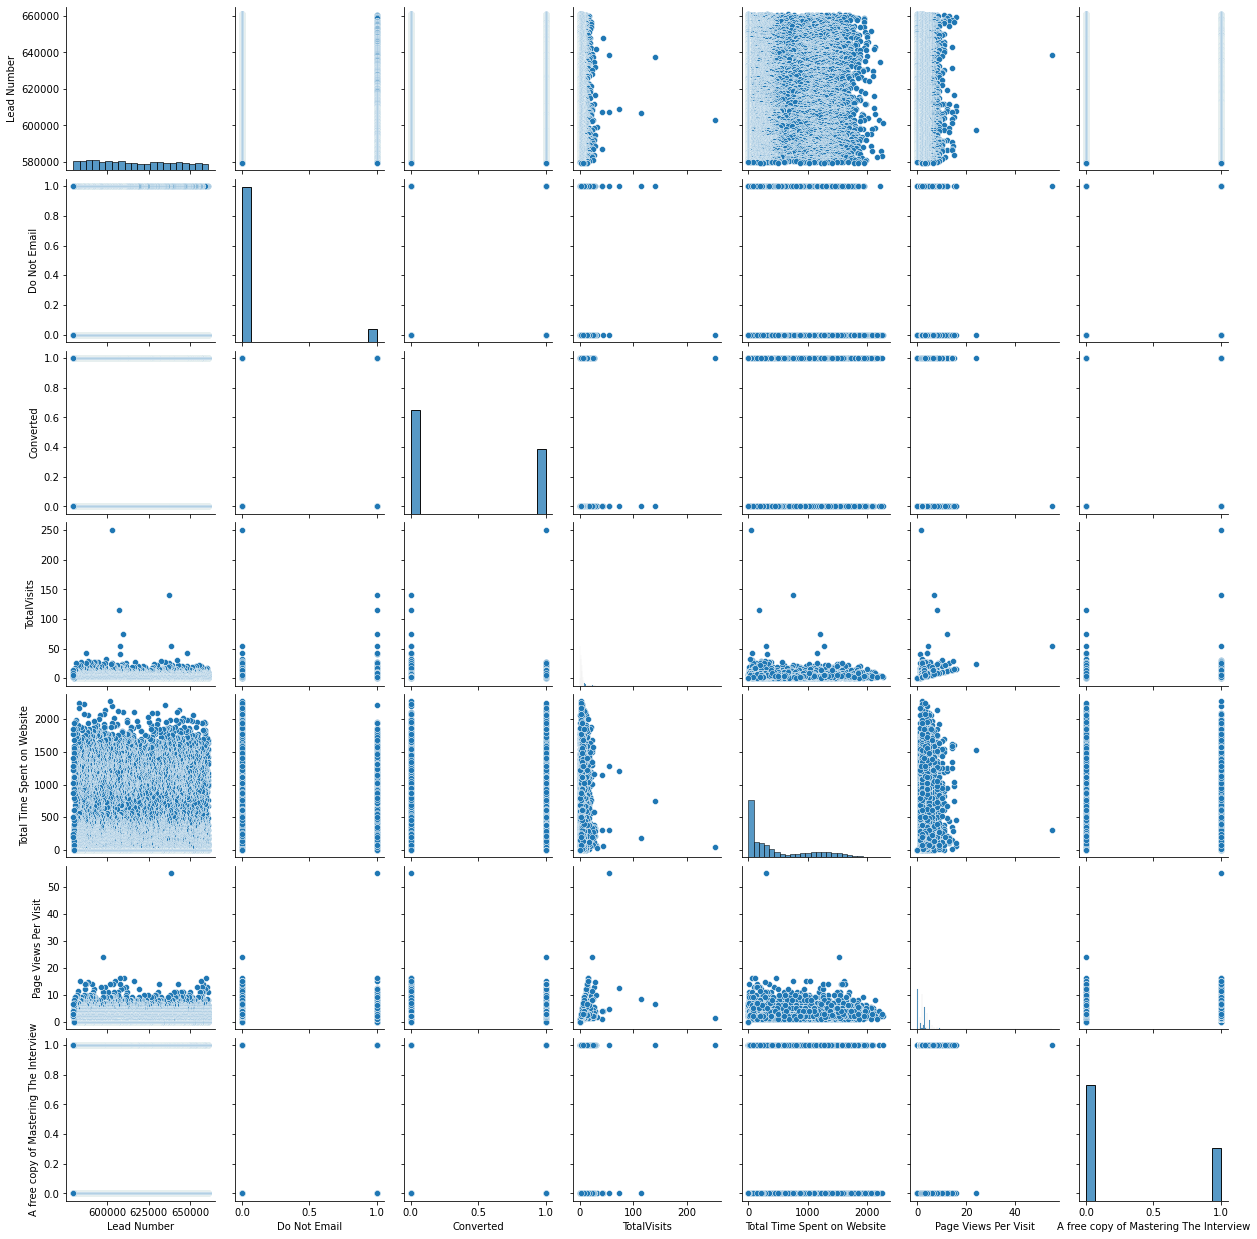

In [92]:
sns.pairplot(leads_df)
plt.show()

For the univariate analysis, I have done and Pair plot and check the relations between different Variables.

#### Bivariate Analysis

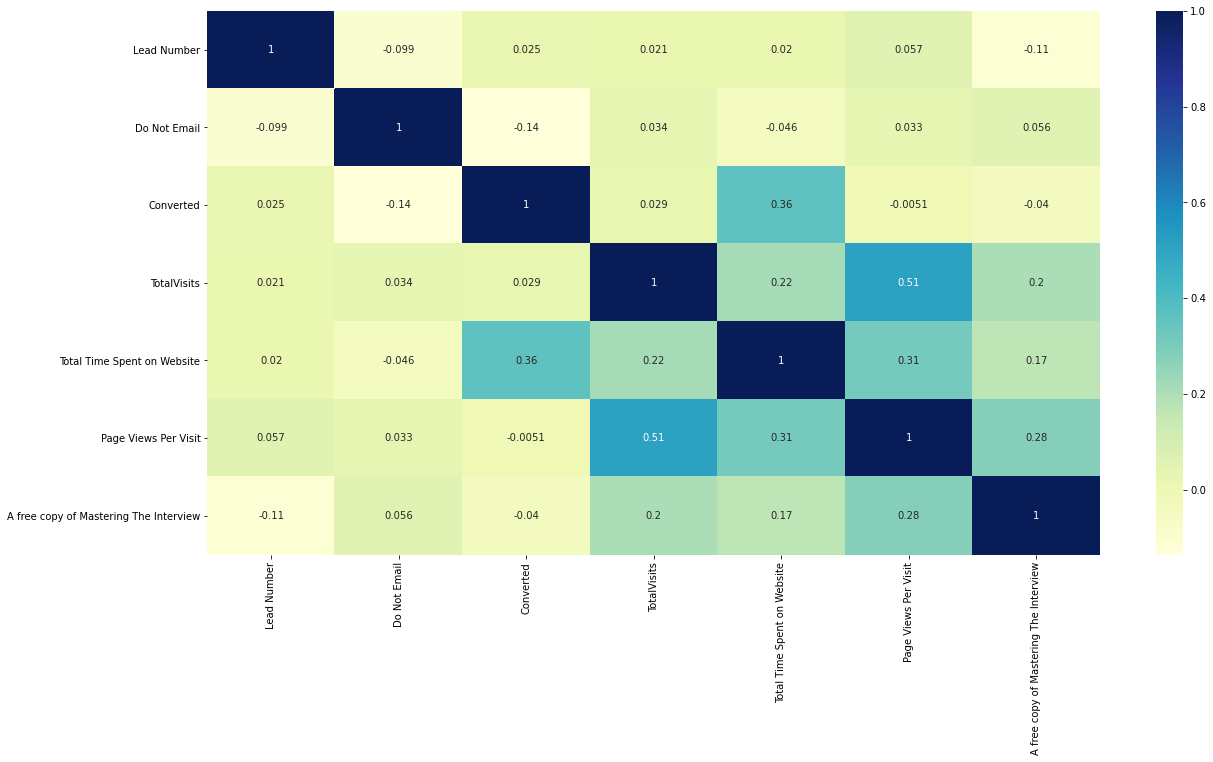

In [93]:
plt.figure(figsize = (20,10))
sns.heatmap(leads_df.corr(),annot = True, cmap="YlGnBu")
plt.show()

For the bivariate analysis, I did a correlation of the variables and we can see that any of the variables are not highly correlated.

Next, we will go towards the Modelling and if we look at the Problem Statement, we need to do the modelling based on the information from the website, so, we will have to drop the variables that are added by the Sales Team.

In [94]:
leads_df = leads_df.drop(['Last Activity', 'Last Notable Activity', 'Tags'],axis=1)

Next we have to create the dummies for the categorical variables

In [95]:
dummy1 = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source','Specialization','What is your current occupation','City']], drop_first=True)

leads_df = pd.concat([leads_df, dummy1], axis=1)

In [96]:
leads_df = leads_df.drop(['Lead Origin', 'Lead Source','Specialization','What is your current occupation','City'],axis=1)

In [97]:
leads_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,...,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [98]:
Conversion_Rate =  (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Conversion_Rate

38.53896103896104

The conversion rate is approximately 38.5%.

#### Outlier Analysis

In [99]:
num_leads = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


Here, we can observe that there are some Outliers in the data but, we will go ahead with the data as is.

In [100]:
X = leads_df.drop(['Converted'], axis=1)

X.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,660727,0,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,660681,0,2.0,1428,1.0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [101]:
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### Test Train Split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling of the Numerical Variables

In [103]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,641410,0,-0.656434,-0.885371,-1.085519,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
6795,597687,0,0.100767,0.005716,-0.470569,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3516,626825,0,0.290067,-0.691418,0.070401,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8105,587928,0,0.290067,1.365219,1.226321,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3934,622366,0,-0.656434,-0.885371,-1.085519,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Data Modeling

In [104]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3048.9
Date:                Wed, 12 Jan 2022   Deviance:                       6097.8
Time:                        03:15:31   Pearson chi2:                 8.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0689      0.912     -1.172      0.241      -2.857       0.719
Lead Number                                           6.009e-07   1.42e-06      0.424      0.672   -2.18e-06    3.38e-06
Do Not Email                                            -1.3062      0.154     -8.464      0.000      -1.609      -1.004
TotalVisits                                              0.1293      0.043      2.973      0.003       0.044       0.215
Total Time Spent on Website                              1.0776      0.037     28.866      0.000       1.004       1.151
Page Views Per Visit                                    -0.0567      0.048     -1.191      0.234      -0.150       0.037
A free copy of Mastering The Interview                  -0.0967      0.100     -0.970      0.332      -0.292       0.099
Lead Origin_Landing Page Submission                     -0.2141      0.110     -1.946      0.052      -0.430       0.001
Lead Origin_Others                                       3.5411      0.292     12.141      0.000       2.969       4.113
Lead Source_Google                                       0.3302      0.106      3.125      0.002       0.123       0.537
Lead Source_Olark Chat                                   0.9833      0.145      6.762      0.000       0.698       1.268
Lead Source_Organic Search                               0.2122      0.120      1.764      0.078      -0.024       0.448
Lead Source_Others                                      -0.1864      0.255     -0.731      0.465      -0.686       0.313
Lead Source_Reference                                    0.3654      0.353      1.034      0.301      -0.327       1.058
Specialization_Finance Management                       -0.3699      0.173     -2.143      0.032      -0.708      -0.032
Specialization_Human Resource Management                -0.0226      0.187     -0.121      0.904      -0.389       0.344
Specialization_Marketing Management                      0.0439      0.187      0.234      0.815      -0.323       0.411
Specialization_Operations Management                     0.0563      0.206      0.273      0.785      -0.348       0.461
Specialization_Others                                    0.0846      0.169      0.502      0.616      -0.246       0.415
What is your current occupation_Unemployed              -0.3082      0.200     -1.539      0.124      -0.701       0.084
What is your current occupation_Working Professional     2.4888      0.266      9.360      0.000       1.968       3.010
City_Other Cities                                        0.1417      0.125      1.133      0.257      -0.103       0.387
City_Other Cities of Maharashtra                         0

In [105]:
logreg = LogisticRegression()

#### RFE for Ranking Variables

In [106]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [107]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False])

In [108]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Others', False, 6),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Other Cities of Maharashtra', False, 3),
 ('City_Other Metro Cities', False, 5),
 ('City_Thane & Outs

In [109]:
col = X_train.columns[rfe.support_]

In [110]:
X_train.columns[~rfe.support_]

Index(['Lead Source_Google', 'Specialization_Others',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Tier II Cities'],
      dtype='object')

#### Modelling of Data

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3056.4
Date:                Wed, 12 Jan 2022   Deviance:                       6112.8
Time:                        03:15:31   Pearson chi2:                 8.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9861      0.899     -1.097      0.273      -2.748       0.776
Lead Number                                           1.034e-06   1.41e-06      0.733      0.464   -1.73e-06     3.8e-06
Do Not Email                                            -1.3257      0.154     -8.618      0.000      -1.627      -1.024
TotalVisits                                              0.1289      0.044      2.940      0.003       0.043       0.215
Total Time Spent on Website                              1.0781      0.037     28.946      0.000       1.005       1.151
Page Views Per Visit                                    -0.0399      0.047     -0.852      0.394      -0.132       0.052
A free copy of Mastering The Interview                  -0.2396      0.085     -2.823      0.005      -0.406      -0.073
Lead Origin_Landing Page Submission                     -0.2528      0.108     -2.338      0.019      -0.465      -0.041
Lead Origin_Others                                       3.5639      0.290     12.273      0.000       2.995       4.133
Lead Source_Olark Chat                                   0.7340      0.120      6.125      0.000       0.499       0.969
Lead Source_Organic Search                               0.0388      0.104      0.371      0.710      -0.166       0.243
Lead Source_Others                                      -0.4503      0.239     -1.884      0.060      -0.919       0.018
Lead Source_Reference                                    0.0817      0.341      0.240      0.810      -0.586       0.749
Specialization_Finance Management                       -0.4660      0.098     -4.754      0.000      -0.658      -0.274
Specialization_Human Resource Management                -0.0862      0.121     -0.714      0.476      -0.323       0.151
Specialization_Marketing Management                     -0.0292      0.121     -0.241      0.810      -0.267       0.209
Specialization_Operations Management                     0.0012      0.148      0.008      0.994      -0.288       0.291
What is your current occupation_Unemployed              -0.2865      0.200     -1.431      0.152      -0.679       0.106
What is your current occupation_Working Professional     2.5099      0.266      9.445      0.000       1.989       3.031
City_Other Cities                                        0.0967      0.122      0.793      0.428      -0.142       0.336
City_Thane & Outskirts                                   0.0781      0.120      0.653      0.514      -0.156       0.313
========================================================================================================================
"""

In [112]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.288900
6795    0.185632
3516    0.255878
8105    0.632400
3934    0.204707
4844    0.980789
3297    0.151807
8071    0.995891
987     0.289108
7423    0.732383
dtype: float64

Based on the model, we get these Predicted Values

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28890015, 0.18563217, 0.25587834, 0.63239967, 0.20470657,
       0.98078907, 0.15180729, 0.99589056, 0.28910753, 0.73238314])

In [114]:
y_train_pred_final = pd.DataFrame({'Lead Number':X_train['Lead Number'],'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob
1871,641410,0,0.288900
6795,597687,0,0.185632
3516,626825,0,0.255878
8105,587928,0,0.632400
3934,622366,0,0.204707


In [115]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
1871,641410,0,0.288900,0
6795,597687,0,0.185632,0
3516,626825,0,0.255878,0
8105,587928,0,0.632400,1
3934,622366,0,0.204707,0


After we get the probability values, we make a Confusion Matrix to get the Accuracy of the Model

In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3506  496]
 [ 881 1585]]


In [117]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7871057513914657


Then, we check for the VIF values of all the variables

In [118]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,49.64
16,What is your current occupation_Unemployed,36.38
7,Lead Origin_Others,6.52
6,Lead Origin_Landing Page Submission,6.04
11,Lead Source_Reference,5.61
12,Specialization_Finance Management,4.26
17,What is your current occupation_Working Profes...,4.11
8,Lead Source_Olark Chat,2.59
5,A free copy of Mastering The Interview,2.25
4,Page Views Per Visit,1.92


Then, based on P Value and VIF value we eleminate Variables where VIF and P Values are high.

In [119]:
col = col.drop('Lead Number', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Thane & Outskirts'],
      dtype='object')

We repeat the same step again and again to eliminate Features which have higher P and VIF Values.

#### Model-2

In [120]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3056.7
Date:                Wed, 12 Jan 2022   Deviance:                       6113.4
Time:                        03:15:32   Pearson chi2:                 8.28e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3487      0.227     -1.536      0.125      -0.794       0.096
Do Not Email                                            -1.3328      0.154     -8.680      0.000      -1.634      -1.032
TotalVisits                                              0.1289      0.044      2.947      0.003       0.043       0.215
Total Time Spent on Website                              1.0779      0.037     28.944      0.000       1.005       1.151
Page Views Per Visit                                    -0.0375      0.047     -0.805      0.421      -0.129       0.054
A free copy of Mastering The Interview                  -0.2434      0.085     -2.873      0.004      -0.409      -0.077
Lead Origin_Landing Page Submission                     -0.2592      0.108     -2.405      0.016      -0.470      -0.048
Lead Origin_Others                                       3.5510      0.290     12.259      0.000       2.983       4.119
Lead Source_Olark Chat                                   0.7267      0.119      6.086      0.000       0.493       0.961
Lead Source_Organic Search                               0.0363      0.104      0.348      0.728      -0.168       0.241
Lead Source_Others                                      -0.4281      0.237     -1.805      0.071      -0.893       0.037
Lead Source_Reference                                    0.0942      0.340      0.277      0.782      -0.572       0.761
Specialization_Finance Management                       -0.4659      0.098     -4.754      0.000      -0.658      -0.274
Specialization_Human Resource Management                -0.0864      0.121     -0.715      0.474      -0.323       0.150
Specialization_Marketing Management                     -0.0274      0.121     -0.226      0.822      -0.265       0.210
Specialization_Operations Management                     0.0014      0.148      0.010      0.992      -0.288       0.291
What is your current occupation_Unemployed              -0.2802      0.200     -1.402      0.161      -0.672       0.112
What is your current occupation_Working Professional     2.5146      0.266      9.468      0.000       1.994       3.035
City_Other Cities                                        0.1008      0.122      0.827      0.408      -0.138       0.340
City_Thane & Outskirts                                   0.0820      0.119      0.686      0.493      -0.152       0.316
========================================================================================================================
"""

In [121]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead Number':X_train['Lead Number'],'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
1871,641410,0,0.283378,0
6795,597687,0,0.188500,0
3516,626825,0,0.253767,0
8105,587928,0,0.639900,1
3934,622366,0,0.203213,0


In [122]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3507  495]
 [ 882 1584]]


In [123]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7871057513914657


In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,9.31
6,Lead Origin_Others,6.51
10,Lead Source_Reference,5.57
5,Lead Origin_Landing Page Submission,5.41
11,Specialization_Finance Management,3.73
7,Lead Source_Olark Chat,2.48
4,A free copy of Mastering The Interview,2.25
3,Page Views Per Visit,1.92
9,Lead Source_Others,1.86
16,What is your current occupation_Working Profes...,1.73


In [125]:
col = col.drop('Specialization_Operations Management', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Thane & Outskirts'],
      dtype='object')

#### Model 3

In [126]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3056.7
Date:                Wed, 12 Jan 2022   Deviance:                       6113.4
Time:                        03:15:32   Pearson chi2:                 8.28e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3485      0.226     -1.541      0.123      -0.792       0.095
Do Not Email                                            -1.3329      0.153     -8.688      0.000      -1.634      -1.032
TotalVisits                                              0.1289      0.044      2.947      0.003       0.043       0.215
Total Time Spent on Website                              1.0779      0.037     28.951      0.000       1.005       1.151
Page Views Per Visit                                    -0.0376      0.047     -0.805      0.421      -0.129       0.054
A free copy of Mastering The Interview                  -0.2434      0.085     -2.874      0.004      -0.409      -0.077
Lead Origin_Landing Page Submission                     -0.2592      0.108     -2.405      0.016      -0.470      -0.048
Lead Origin_Others                                       3.5510      0.290     12.259      0.000       2.983       4.119
Lead Source_Olark Chat                                   0.7267      0.119      6.086      0.000       0.493       0.961
Lead Source_Organic Search                               0.0363      0.104      0.348      0.728      -0.168       0.241
Lead Source_Others                                      -0.4281      0.237     -1.805      0.071      -0.893       0.037
Lead Source_Reference                                    0.0942      0.340      0.277      0.782      -0.572       0.761
Specialization_Finance Management                       -0.4662      0.095     -4.929      0.000      -0.652      -0.281
Specialization_Human Resource Management                -0.0867      0.118     -0.733      0.464      -0.319       0.145
Specialization_Marketing Management                     -0.0276      0.119     -0.233      0.816      -0.260       0.205
What is your current occupation_Unemployed              -0.2801      0.200     -1.402      0.161      -0.672       0.111
What is your current occupation_Working Professional     2.5148      0.265      9.478      0.000       1.995       3.035
City_Other Cities                                        0.1008      0.122      0.827      0.408      -0.138       0.340
City_Thane & Outskirts                                   0.0820      0.119      0.687      0.492      -0.152       0.316
========================================================================================================================
"""

In [127]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead Number':X_train['Lead Number'],'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
1871,641410,0,0.283382,0
6795,597687,0,0.188501,0
3516,626825,0,0.253765,0
8105,587928,0,0.639956,1
3934,622366,0,0.203215,0


In [128]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3507  495]
 [ 882 1584]]


In [129]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7871057513914657


In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,8.89
6,Lead Origin_Others,6.51
10,Lead Source_Reference,5.57
5,Lead Origin_Landing Page Submission,5.41
11,Specialization_Finance Management,3.49
7,Lead Source_Olark Chat,2.48
4,A free copy of Mastering The Interview,2.25
3,Page Views Per Visit,1.92
9,Lead Source_Others,1.86
15,What is your current occupation_Working Profes...,1.67


#### Model 4

In [131]:
col = col.drop('Specialization_Marketing Management', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Thane & Outskirts'],
      dtype='object')

In [132]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3056.7
Date:                Wed, 12 Jan 2022   Deviance:                       6113.4
Time:                        03:15:32   Pearson chi2:                 8.29e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3564      0.224     -1.594      0.111      -0.795       0.082
Do Not Email                                            -1.3324      0.153     -8.686      0.000      -1.633      -1.032
TotalVisits                                              0.1291      0.044      2.950      0.003       0.043       0.215
Total Time Spent on Website                              1.0779      0.037     28.952      0.000       1.005       1.151
Page Views Per Visit                                    -0.0375      0.047     -0.803      0.422      -0.129       0.054
A free copy of Mastering The Interview                  -0.2423      0.085     -2.865      0.004      -0.408      -0.077
Lead Origin_Landing Page Submission                     -0.2584      0.108     -2.399      0.016      -0.469      -0.047
Lead Origin_Others                                       3.5520      0.290     12.263      0.000       2.984       4.120
Lead Source_Olark Chat                                   0.7276      0.119      6.096      0.000       0.494       0.961
Lead Source_Organic Search                               0.0382      0.104      0.367      0.713      -0.166       0.242
Lead Source_Others                                      -0.4279      0.237     -1.804      0.071      -0.893       0.037
Lead Source_Reference                                    0.0931      0.340      0.274      0.784      -0.573       0.759
Specialization_Finance Management                       -0.4592      0.090     -5.123      0.000      -0.635      -0.284
Specialization_Human Resource Management                -0.0805      0.115     -0.698      0.485      -0.306       0.145
What is your current occupation_Unemployed              -0.2801      0.200     -1.402      0.161      -0.672       0.111
What is your current occupation_Working Professional     2.5143      0.265      9.477      0.000       1.994       3.034
City_Other Cities                                        0.1022      0.122      0.840      0.401      -0.136       0.341
City_Thane & Outskirts                                   0.0825      0.119      0.691      0.490      -0.152       0.317
========================================================================================================================
"""

In [133]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead Number':X_train['Lead Number'],'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
1871,641410,0,0.287559,0
6795,597687,0,0.188885,0
3516,626825,0,0.253787,0
8105,587928,0,0.638335,1
3934,622366,0,0.203197,0


In [134]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3507  495]
 [ 884 1582]]


In [135]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7867965367965368


In [136]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,8.32
6,Lead Origin_Others,6.51
10,Lead Source_Reference,5.56
5,Lead Origin_Landing Page Submission,5.40
11,Specialization_Finance Management,3.20
7,Lead Source_Olark Chat,2.48
4,A free copy of Mastering The Interview,2.24
3,Page Views Per Visit,1.92
9,Lead Source_Others,1.86
14,What is your current occupation_Working Profes...,1.62


In [137]:
col = col.drop('Lead Source_Organic Search', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Thane & Outskirts'],
      dtype='object')

#### Model 5

In [138]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3056.8
Date:                Wed, 12 Jan 2022   Deviance:                       6113.6
Time:                        03:15:32   Pearson chi2:                 8.30e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3484      0.222     -1.566      0.117      -0.784       0.088
Do Not Email                                            -1.3319      0.153     -8.681      0.000      -1.633      -1.031
TotalVisits                                              0.1298      0.044      2.961      0.003       0.044       0.216
Total Time Spent on Website                              1.0775      0.037     28.955      0.000       1.005       1.150
Page Views Per Visit                                    -0.0340      0.046     -0.747      0.455      -0.123       0.055
A free copy of Mastering The Interview                  -0.2378      0.084     -2.842      0.004      -0.402      -0.074
Lead Origin_Landing Page Submission                     -0.2659      0.106     -2.515      0.012      -0.473      -0.059
Lead Origin_Others                                       3.5528      0.290     12.264      0.000       2.985       4.121
Lead Source_Olark Chat                                   0.7219      0.118      6.104      0.000       0.490       0.954
Lead Source_Others                                      -0.4360      0.236     -1.846      0.065      -0.899       0.027
Lead Source_Reference                                    0.0869      0.340      0.256      0.798      -0.579       0.753
Specialization_Finance Management                       -0.4587      0.090     -5.119      0.000      -0.634      -0.283
Specialization_Human Resource Management                -0.0820      0.115     -0.712      0.476      -0.308       0.144
What is your current occupation_Unemployed              -0.2794      0.200     -1.399      0.162      -0.671       0.112
What is your current occupation_Working Professional     2.5145      0.265      9.480      0.000       1.995       3.034
City_Other Cities                                        0.1053      0.121      0.867      0.386      -0.133       0.343
City_Thane & Outskirts                                   0.0821      0.119      0.688      0.491      -0.152       0.316
========================================================================================================================
"""

In [139]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead Number':X_train['Lead Number'],'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
1871,641410,0,0.287372,0
6795,597687,0,0.190058,0
3516,626825,0,0.254578,0
8105,587928,0,0.639496,1
3934,622366,0,0.203131,0


In [140]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3506  496]
 [ 882 1584]]


In [141]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7869511440940012


In [142]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,7.98
6,Lead Origin_Others,6.51
9,Lead Source_Reference,5.55
5,Lead Origin_Landing Page Submission,5.26
10,Specialization_Finance Management,3.20
7,Lead Source_Olark Chat,2.45
4,A free copy of Mastering The Interview,2.20
8,Lead Source_Others,1.84
3,Page Views Per Visit,1.83
13,What is your current occupation_Working Profes...,1.59


In [143]:
col = col.drop('Lead Source_Reference', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Thane & Outskirts'],
      dtype='object')

#### Model 6

In [144]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3056.8
Date:                Wed, 12 Jan 2022   Deviance:                       6113.6
Time:                        03:15:32   Pearson chi2:                 8.25e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3445      0.222     -1.553      0.120      -0.779       0.090
Do Not Email                                            -1.3338      0.153     -8.699      0.000      -1.634      -1.033
TotalVisits                                              0.1301      0.044      2.965      0.003       0.044       0.216
Total Time Spent on Website                              1.0774      0.037     28.953      0.000       1.004       1.150
Page Views Per Visit                                    -0.0339      0.046     -0.744      0.457      -0.123       0.055
A free copy of Mastering The Interview                  -0.2381      0.084     -2.846      0.004      -0.402      -0.074
Lead Origin_Landing Page Submission                     -0.2683      0.105     -2.547      0.011      -0.475      -0.062
Lead Origin_Others                                       3.6108      0.182     19.850      0.000       3.254       3.967
Lead Source_Olark Chat                                   0.7205      0.118      6.098      0.000       0.489       0.952
Lead Source_Others                                      -0.4711      0.194     -2.434      0.015      -0.850      -0.092
Specialization_Finance Management                       -0.4603      0.089     -5.151      0.000      -0.635      -0.285
Specialization_Human Resource Management                -0.0820      0.115     -0.712      0.476      -0.308       0.144
What is your current occupation_Unemployed              -0.2803      0.200     -1.405      0.160      -0.671       0.111
What is your current occupation_Working Professional     2.5145      0.265      9.483      0.000       1.995       3.034
City_Other Cities                                        0.1053      0.121      0.867      0.386      -0.133       0.343
City_Thane & Outskirts                                   0.0830      0.119      0.695      0.487      -0.151       0.317
========================================================================================================================
"""

In [145]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead Number':X_train['Lead Number'],'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
1871,641410,0,0.287648,0
6795,597687,0,0.189848,0
3516,626825,0,0.254609,0
8105,587928,0,0.639675,1
3934,622366,0,0.203088,0


In [146]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3506  496]
 [ 882 1584]]


In [147]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7869511440940012


In [148]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,7.90
5,Lead Origin_Landing Page Submission,5.22
9,Specialization_Finance Management,3.19
7,Lead Source_Olark Chat,2.44
4,A free copy of Mastering The Interview,2.20
3,Page Views Per Visit,1.83
6,Lead Origin_Others,1.72
12,What is your current occupation_Working Profes...,1.55
1,TotalVisits,1.31
2,Total Time Spent on Website,1.25


We can observe that, there is not much change in accuracy. So, this can be the final Model and we can make predictions based on this Model.

### Confusion Matrix Predictions

Based on the final Confusion Matrix, we extract True Positive, True Negative, False Positive and False Negative

In [149]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

##### Next we check the sensitivity of our logistic regression model

In [150]:
TP / float(TP+FN)

0.6423357664233577

##### Specificity

In [151]:
TN / float(TN+FP)

0.8760619690154923

##### False postive rate - predicting converted when customer does not have converted

In [152]:
print(FP/ float(TN+FP))

0.12393803098450774


##### Positive predictive value

In [153]:
print (TP / float(TP+FP))

0.7615384615384615


##### Negative predictive value

In [154]:
print (TN / float(TN+ FN))

0.7989972652689152


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

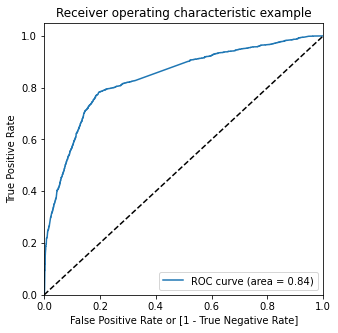

In [157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

In [158]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,641410,0,0.287648,0,1,1,1,0,0,0,0,0,0,0
6795,597687,0,0.189848,0,1,1,0,0,0,0,0,0,0,0
3516,626825,0,0.254609,0,1,1,1,0,0,0,0,0,0,0
8105,587928,0,0.639675,1,1,1,1,1,1,1,1,0,0,0
3934,622366,0,0.203088,0,1,1,1,0,0,0,0,0,0,0


In [159]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.440476  0.987429  0.103448
0.2   0.2  0.640383  0.904704  0.477511
0.3   0.3  0.796846  0.770073  0.813343
0.4   0.4  0.798856  0.712084  0.852324
0.5   0.5  0.786951  0.642336  0.876062
0.6   0.6  0.772109  0.551500  0.908046
0.7   0.7  0.750773  0.441606  0.941279
0.8   0.8  0.722635  0.316707  0.972764
0.9   0.9  0.684447  0.180860  0.994753


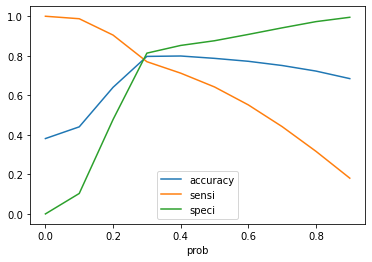

In [160]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [161]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,641410,0,0.287648,0,1,1,1,0,0,0,0,0,0,0,0
6795,597687,0,0.189848,0,1,1,0,0,0,0,0,0,0,0,0
3516,626825,0,0.254609,0,1,1,1,0,0,0,0,0,0,0,0
8105,587928,0,0.639675,1,1,1,1,1,1,1,1,0,0,0,1
3934,622366,0,0.203088,0,1,1,1,0,0,0,0,0,0,0,0


Next, we check the overall accuracy

In [162]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7968460111317254

Next we make a Confusion Matrix based on the Optimum Point

In [163]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3255,  747],
       [ 567, 1899]], dtype=int64)

In [164]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

##### Next, we check the sensitivity of our logistic regression model

In [165]:
TP / float(TP+FN)

0.7700729927007299

##### Specificity

In [166]:
TN / float(TN+FP)

0.8133433283358321

##### False Postive Rate

In [167]:
print(FP/ float(TN+FP))

0.1866566716641679


##### Positive predictive value

In [168]:
print (TP / float(TP+FP))

0.717687074829932


##### Negative Predictive Value

In [169]:
print (TN / float(TN+ FN))

0.8516483516483516


#### Precision and Recall

In [170]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3506,  496],
       [ 882, 1584]], dtype=int64)

In [171]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7615384615384615

In [172]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6423357664233577

#### Precision and recall tradeoff

In [173]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(1871    0
 6795    0
 3516    0
 8105    0
 3934    0
        ..
 350     1
 79      1
 8039    1
 6936    0
 5640    0
 Name: Converted, Length: 6468, dtype: int64,
 1871    0
 6795    0
 3516    0
 8105    1
 3934    0
        ..
 350     1
 79      1
 8039    0
 6936    0
 5640    0
 Name: predicted, Length: 6468, dtype: int64)

In [174]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

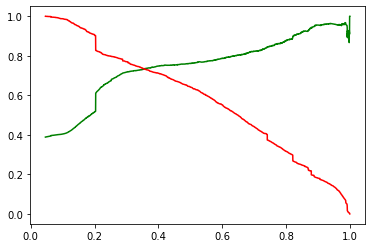

In [175]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

Next we Scale the columns in the test set

In [176]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [177]:
X_test_pred = pd.DataFrame({'Lead Number':X_test['Lead Number']})
X_test_pred

,Lead Number
4269,619003
2376,636884
7766,590281
9199,579892
4359,617929
...,...
8649,583730
2152,639134
7101,595041
5331,608916


In [178]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Olark Chat,Lead Source_Others,Specialization_Finance Management,Specialization_Human Resource Management,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Thane & Outskirts
4269,0,0.857967,0.964504,2.613424,0,0,0,0,0,1,0,1,0,0,0
2376,0,-0.656434,-0.885371,-1.085519,0,0,1,0,0,1,0,1,0,0,0
7766,0,0.290067,-0.777416,1.226321,0,0,0,0,0,0,0,0,1,0,1
9199,0,-0.656434,-0.885371,-1.085519,0,0,0,1,0,1,0,1,0,0,0
4359,0,-0.656434,-0.885371,-1.085519,0,0,1,0,0,0,0,1,0,0,1


In [179]:
X_test_sm = sm.add_constant(X_test)

In [180]:
y_test_pred = res.predict(X_test_sm)

In [181]:
y_test_pred[:10]

4269    0.494280
2376    0.821006
7766    0.804007
9199    0.203088
4359    0.887597
9186    0.365298
1631    0.422113
8963    0.181103
8007    0.160989
5324    0.174737
dtype: float64

In [182]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
y_pred_1.head()

,0
4269,0.494280
2376,0.821006
7766,0.804007
9199,0.203088
4359,0.887597


In [184]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = X_test_pred['Lead Number']

In [185]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [186]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [187]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,619003,0.494280
1,1,636884,0.821006
2,1,590281,0.804007
3,0,579892,0.203088
4,1,617929,0.887597


In [188]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [189]:
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [190]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,619003,1,0.494280
1,636884,1,0.821006
2,590281,1,0.804007
3,579892,0,0.203088
4,617929,1,0.887597


In [191]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.39 else 0)

In [192]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,619003,1,0.494280,1
1,636884,1,0.821006,1
2,590281,1,0.804007,1
3,579892,0,0.203088,0
4,617929,1,0.887597,1


Next, we check the Accuracy of the Model

In [193]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7940115440115441

We can observe that, the accuracy is very near to the training set.

Then, we make the Confusion Matrix based on the Test Values

In [194]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1418,  259],
       [ 312,  783]], dtype=int64)

In [195]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

#### Next, we check the sensitivity of our logistic regression model

In [196]:
TP / float(TP+FN)

0.7150684931506849

#### Specificity

In [197]:
TN / float(TN+FP)

0.8455575432319619

With this the Modelling part is completed.

### Creating the Score

We concat both the training predictions and testing predictions

In [198]:
leads_df_pred = pd.concat([y_train_pred_final[['Lead Number','Converted_Prob']],y_pred_final[['Lead Number','Converted_Prob']]])

In [199]:
leads_df_pred.head()

,Lead Number,Converted_Prob
1871,641410,0.287648
6795,597687,0.189848
3516,626825,0.254609
8105,587928,0.639675
3934,622366,0.203088


Then, we merge the DF having Probability with the earlier leads data frame on the Lead Number Column

In [200]:
leads_df = pd.merge(leads_df,leads_df_pred, on = 'Lead Number', how = 'left')

In [201]:
leads_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,...,Specialization_Operations Management,Specialization_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Converted_Prob
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.203088
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.337395
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.765794
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0.216630
4,660681,0,1,2.0,1428,1.0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0.620776


Next, we create the Score Column by multiplying the probability column with 100.

In [202]:
leads_df['Score']= leads_df['Converted_Prob'].apply(lambda i: round((i*100),2))

In [203]:
leads_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,...,Specialization_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Converted_Prob,Score
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.203088,20.31
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0.337395,33.74
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0.765794,76.58
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,1,1,0,0,0,0,0,0,0.216630,21.66
4,660681,0,1,2.0,1428,1.0,0,1,0,1,...,0,1,0,0,0,0,0,0,0.620776,62.08
